<a href="https://colab.research.google.com/github/BishalDali/Usa-House-Prediction/blob/main/BishalDali_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student ID = 2358426                                                                                 
Student Name = Rachit Poudel

# **Forest Fires**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


**Importing Data in notebook**

**Data Understanding**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/forestfires.csv"

In [ ]:
df = pd.read_csv(path)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.shape

(517, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   00       517 non-null    int64  
 1   00       517 non-null    int64  
 2   00       517 non-null    int64  
 3   00       517 non-null    int64  
 4   month    517 non-null    object 
 5   FFMC     517 non-null    float64
 6   DMC      517 non-null    float64
 7   DC       517 non-null    float64
 8   ISI      517 non-null    float64
 9   temp     517 non-null    float64
 10  RH       517 non-null    float64
 11  wind     517 non-null    float64
 12  rain     517 non-null    float64
 13  area     517 non-null    float64
 14  day_fri  517 non-null    uint8  
 15  day_mon  517 non-null    uint8  
 16  day_sat  517 non-null    uint8  
 17  day_sun  517 non-null    uint8  
 18  day_thu  517 non-null    uint8  
 19  day_tue  517 non-null    uint8  
 20  day_wed  517 non-null    uint8  
dtypes: float64(9), i

In [ ]:
df.columns

Index(['00', '00', '00', '00', 'month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp',
       'RH', 'wind', 'rain', 'area', 'day_fri', 'day_mon', 'day_sat',
       'day_sun', 'day_thu', 'day_tue', 'day_wed'],
      dtype='object')

In [ ]:
#Checking data if it is null in order to clean the columns that might affect the result of prediction
df.isnull()

,00,00,00,00,month,FFMC,DMC,DC,ISI,temp,...,wind,rain,area,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

00         0
00         0
00         0
00         0
month      0
FFMC       0
DMC        0
DC         0
ISI        0
temp       0
RH         0
wind       0
rain       0
area       0
day_fri    0
day_mon    0
day_sat    0
day_sun    0
day_thu    0
day_tue    0
day_wed    0
dtype: int64

In [ ]:
df.describe()

,00,00,00,00,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
count,517.0,517.0,517.0,517.0,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,1.0,1.0,1.0,1.0,-1.752306e-15,-2.748715e-17,6.871787e-17,1.030768e-17,2.542561e-16,2.198972e-16,-4.191790e-16,-6.871787e-18,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449
std,0.0,0.0,0.0,0.0,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138
min,1.0,1.0,1.0,1.0,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.0,1.0,1.0,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.0,1.0,1.0,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.0,1.0,1.0,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,1.0,1.0,1.0,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The Forest Fire have different column in the datasheat like FFMC "Fine Fuel Moisture Code", DMC "Duff Moisture Code", DC "Drought Code", ISI "Initial Spread Index", temp, RH "Relative humidity", wind, rain, area.

**Data Analysis**

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset.

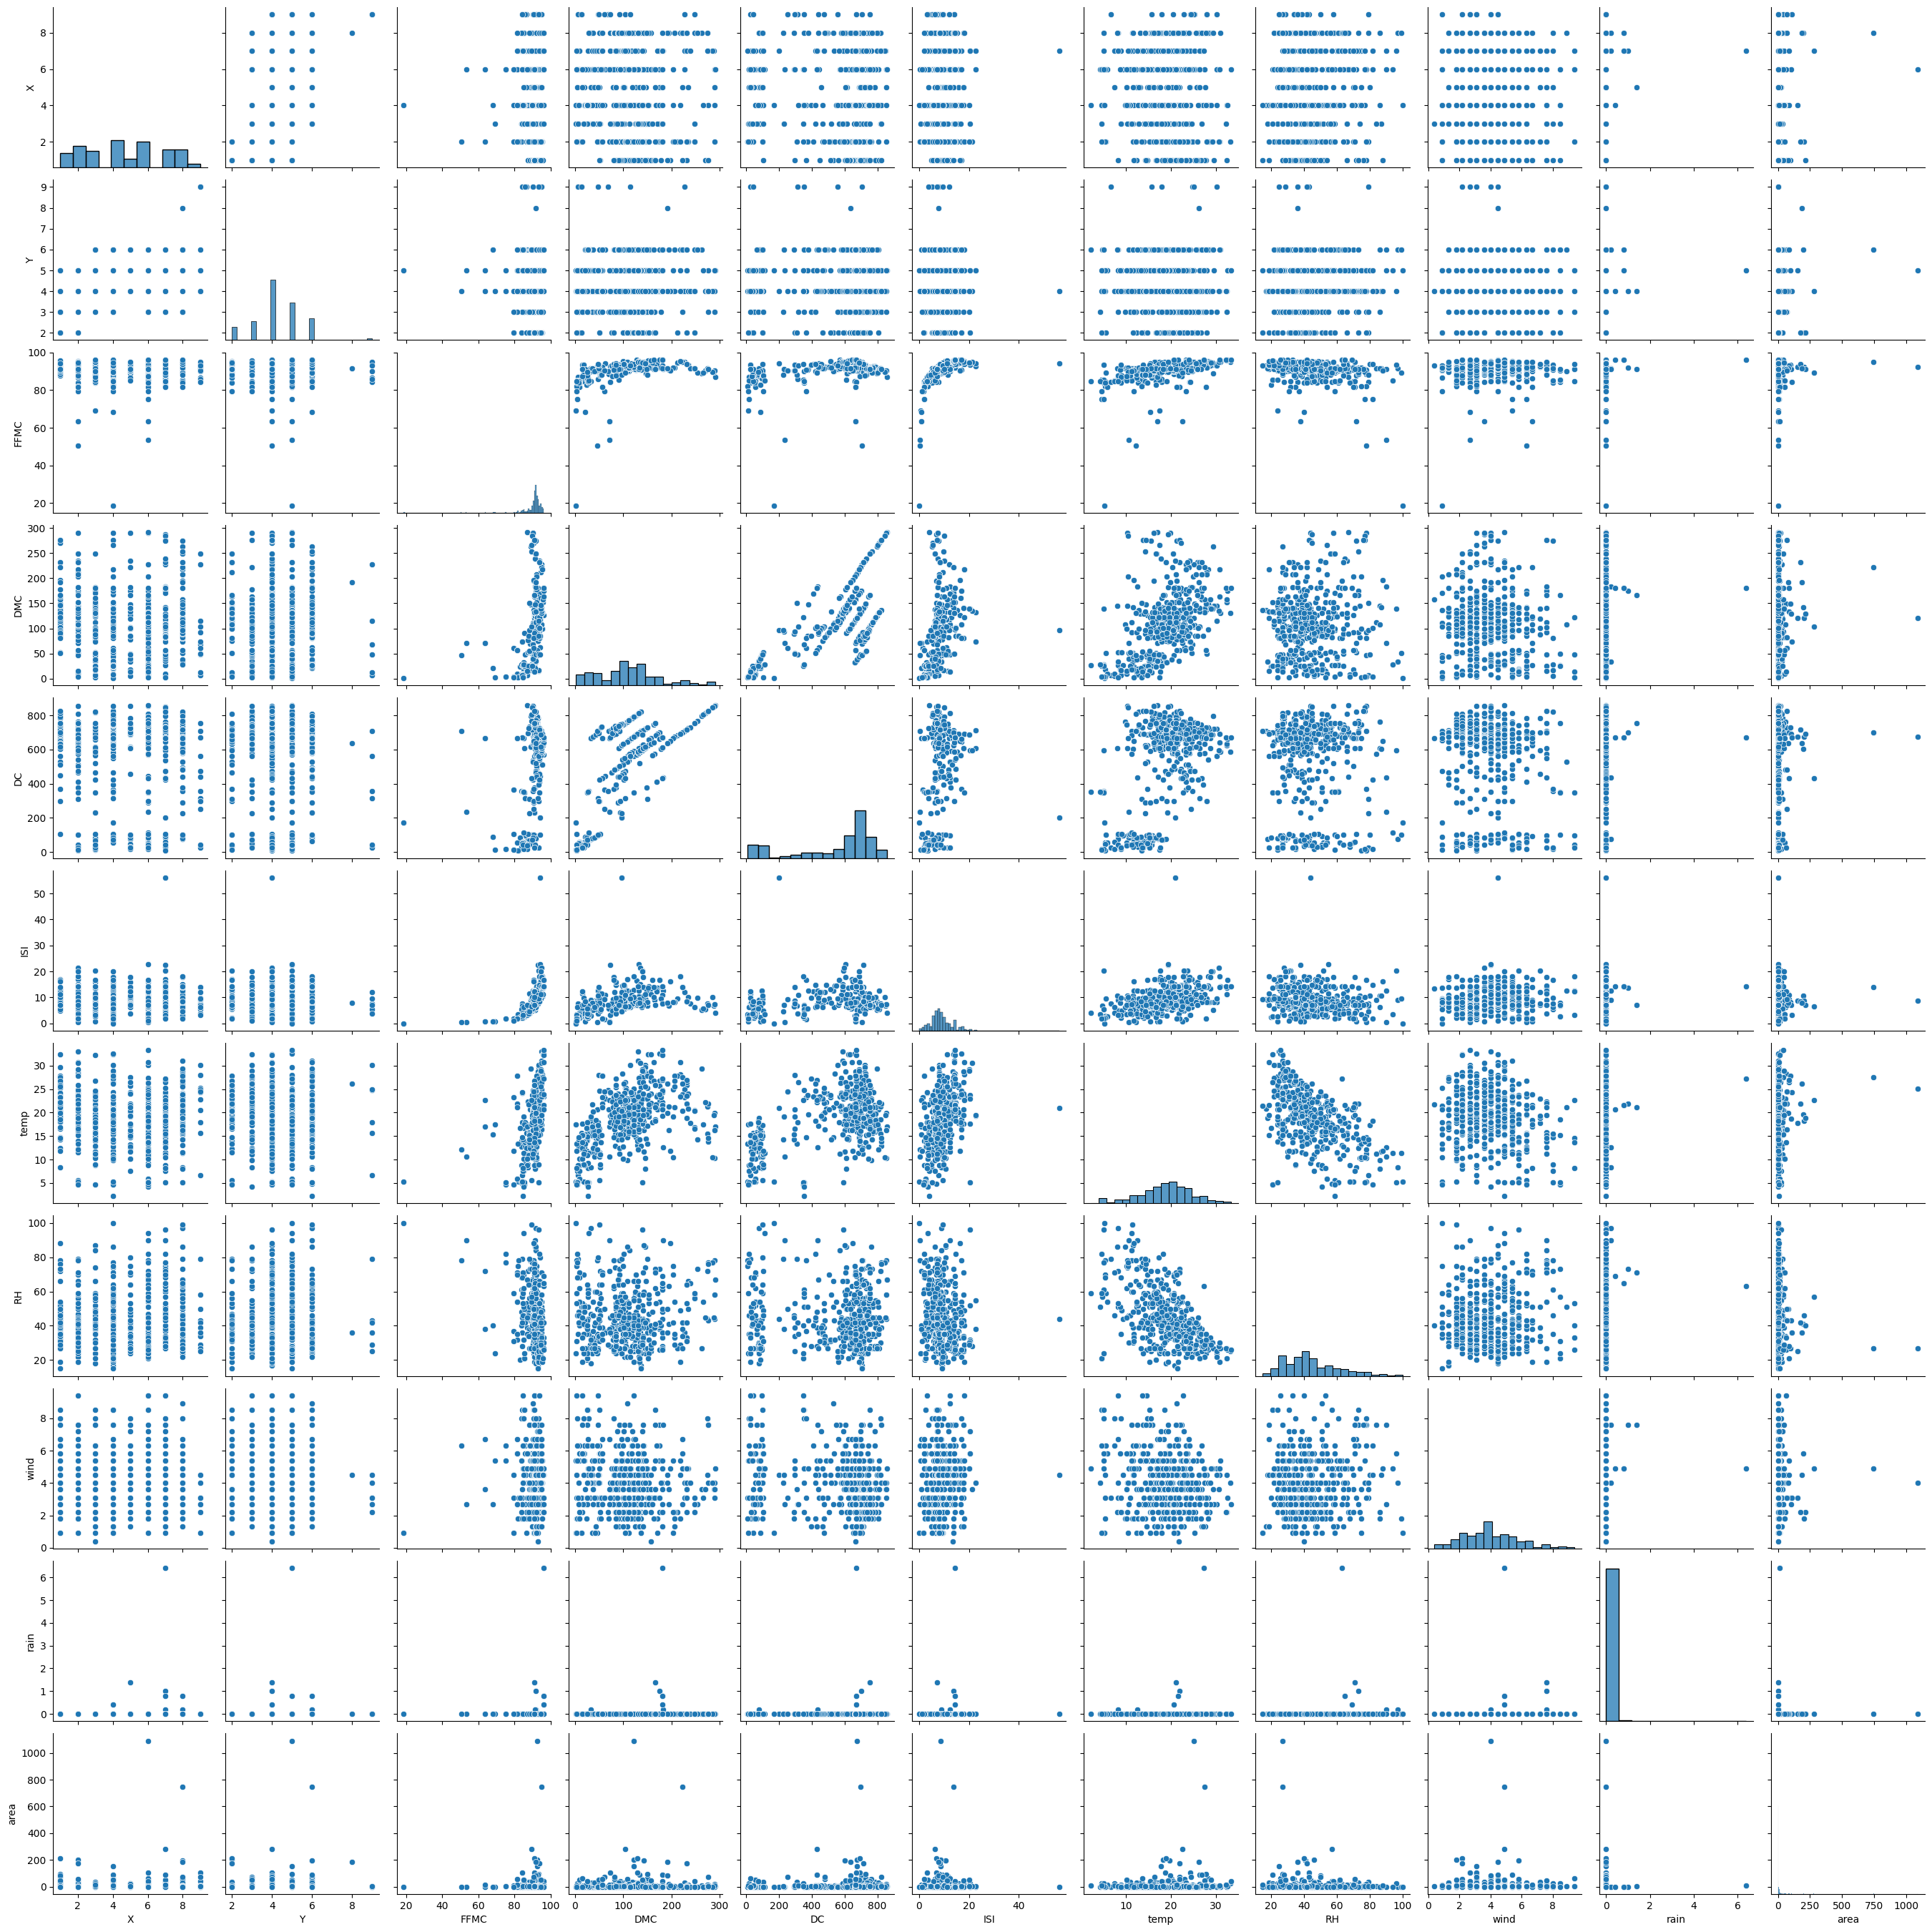

In [ ]:
#Relating every dependent and independent numerical columns in pairplot
sns.pairplot(df)

A Distplot or distribution plot, depicts the variation in the data distribution

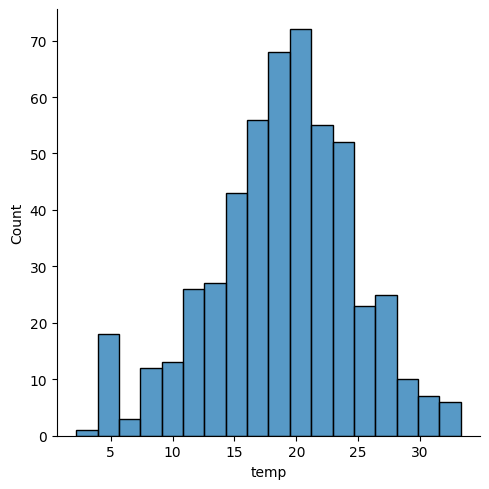

In [ ]:
sns.displot(df['temp'])

In [ ]:
# Counts the average rain in the forest area
df['rain'].value_counts()

0.0    509
0.2      2
0.8      2
1.0      1
6.4      1
0.4      1
1.4      1
Name: rain, dtype: int64

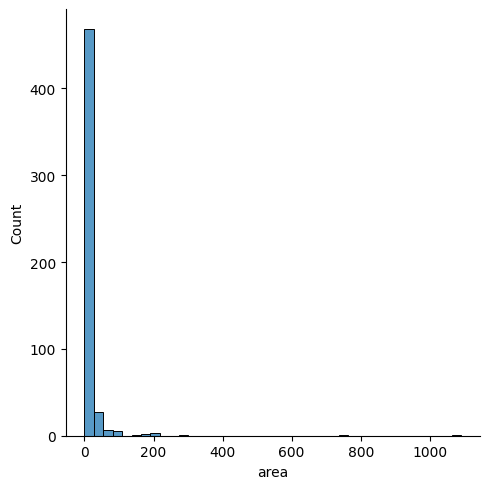

In [ ]:
sns.displot(df['area'], kde=False, bins=40)

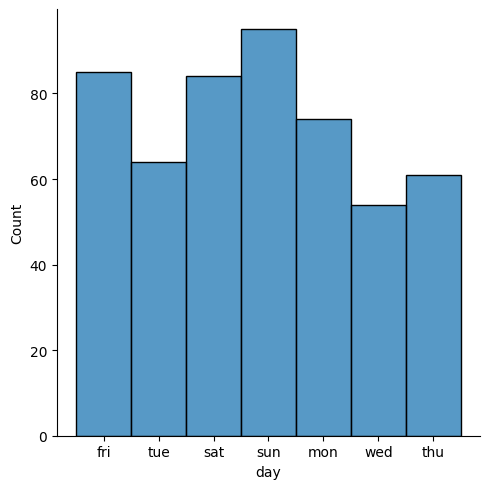

In [ ]:
sns.displot(df['day'])

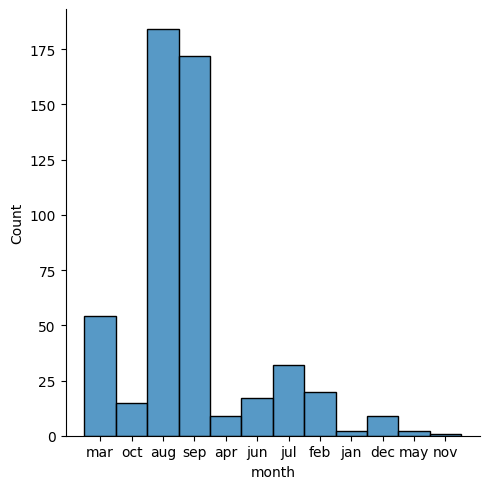

In [ ]:
sns.displot(df['month'], kde=False, bins = 20)

<ipython-input-26-ec81af257d3a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['wind'])


<Axes: xlabel='wind', ylabel='Density'>

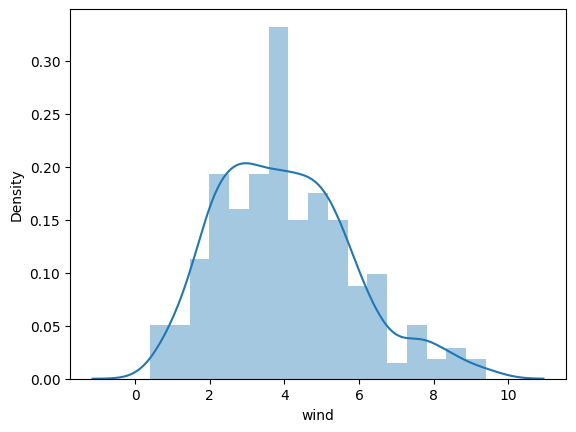

In [ ]:
sns.distplot(df['wind'])

 Scatter plot is thea graph in which the values of two variables are plotted along two axes, the pattern of the resulting points revealing any correlation present.

<Axes: xlabel='temp', ylabel='RH'>

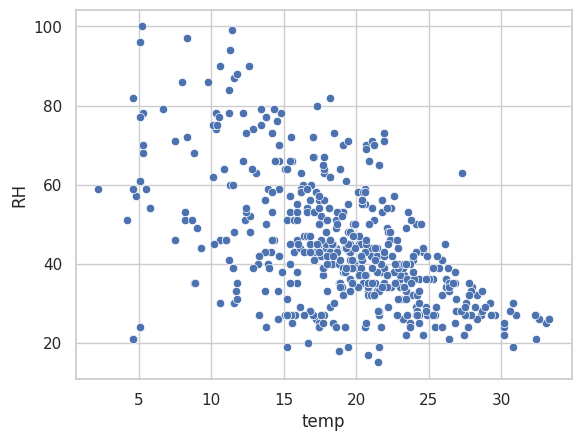

In [ ]:
# Comparing temp according to month
sns.scatterplot(x=df['temp'], y=df['RH'])

In [ ]:
# Counts

df['area'].value_counts()


0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64

<Axes: xlabel='temp', ylabel='area'>

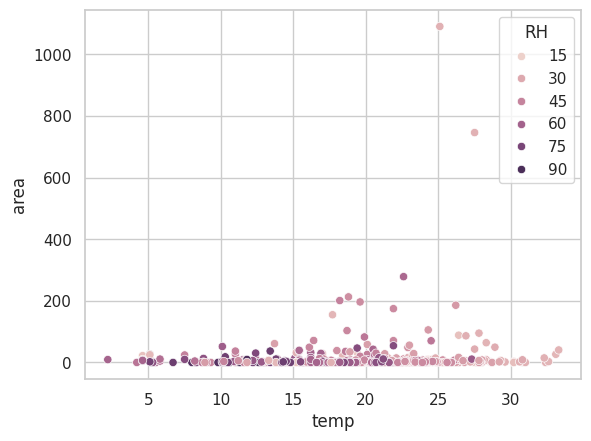

In [ ]:

sns.scatterplot(x=df['temp'], y=df['area'], hue=df['RH'])

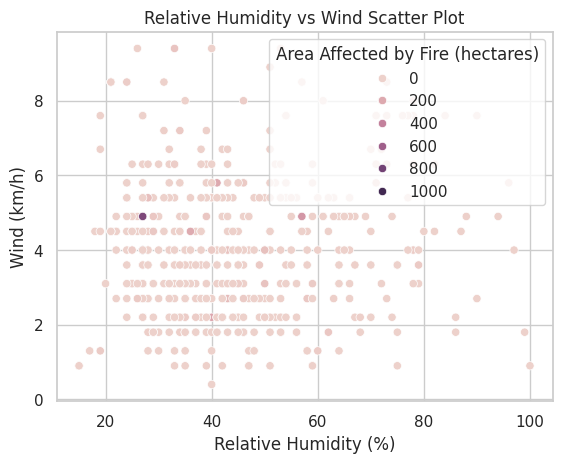

In [ ]:
# Create scatter plot using seaborn
sns.scatterplot(x=df['RH'], y=df['wind'], hue=df['area'])
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Wind (km/h)')
plt.title('Relative Humidity vs Wind Scatter Plot')
plt.legend(title='Area Affected by Fire (hectares)', loc='upper right')
plt.show()

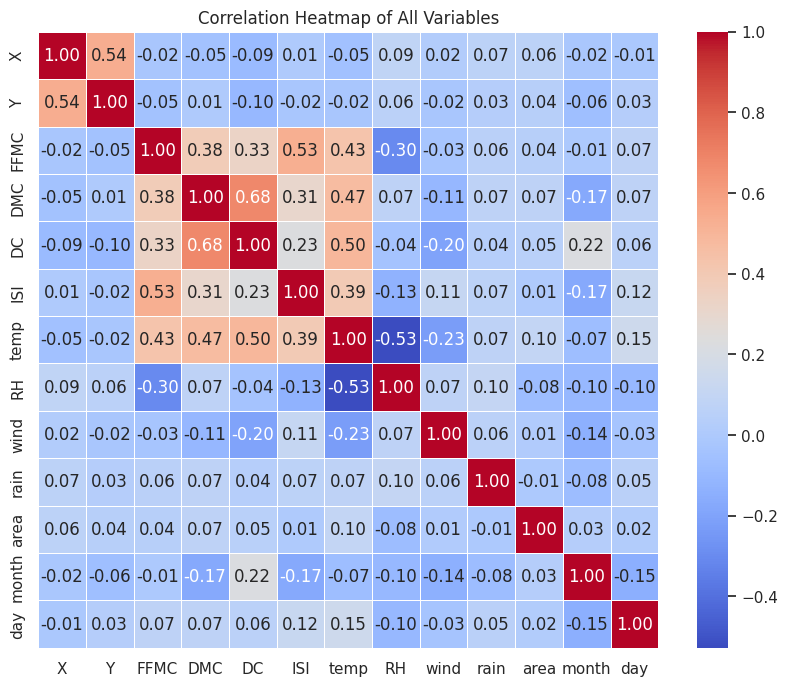

In [ ]:
# #Displaying Correllation of each variable

# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, cmap="Blues")

numeric_data = df.select_dtypes(include='number')
categorical_data = df.select_dtypes(exclude='number')


encoded_categorical_data = categorical_data.apply(lambda x: x.astype('category').cat.codes)

all_data = pd.concat([numeric_data, encoded_categorical_data], axis=1)
correlation_matrix = all_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of All Variables')
plt.show()

Finally, we can visually relate the how different factors is effecting house price in USA in different Level.

# **Data Cleaning**

In [ ]:
#As the column 'Address' does not show any dependicies and is not possible to relate it with the value of house
#Removing the column 'Address'
df=df.drop(['day'],axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   FFMC    517 non-null    float64
 4   DMC     517 non-null    float64
 5   DC      517 non-null    float64
 6   ISI     517 non-null    float64
 7   temp    517 non-null    float64
 8   RH      517 non-null    int64  
 9   wind    517 non-null    float64
 10  rain    517 non-null    float64
 11  area    517 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 48.6+ KB


# **Training The Data**

This code snippet effectively prepares your data for linear regression by separating the characteristics and target variable into distinct DataFrames. It is an important stage in model training to understand the link between characteristics and the target variable.

In [ ]:
#Distributing target variable and its dependent variable in X and Y
X = df.drop(['month'],axis=1)
Y = df['month']
print(X.head(),Y.head())

   00  00  00  X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0   1   1   1  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1   1   1   1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2   1   1   1  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3   1   1   1  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4   1   1   1  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0 0    mar
1    oct
2    oct
3    mar
4    mar
Name: month, dtype: object


Sliding window approach: This normalisation technique may be utilised in particular cases when you wish to normalise values inside a window while taking into account the local environment. However, in most circumstances, normalising each column globally (by dividing by the entire highest value in that column) is more efficient.
Error correction: To avoid accessing non-existent columns, the loop condition should be i <n.
Alternative Normalisation Methods: Consider various normalisation approaches, such as Min-Max scaling (using scikit-learn's MinMaxScaler) or standardisation (using StandardScaler), which may be better appropriate for your data and aims.

In [ ]:
#Normalizing the value of each variables
n = len(X.columns)
for i in range (0,n+1):
  X.iloc[:, :i]= X.iloc[:, :i]/np.max(X.iloc[:, :i])
X.head

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-232-d700b8f668f8>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:, :i]= X.iloc[:, :i]/np.max(X.iloc[:, :i])
/usr/local/lib/pytho

<bound method NDFrame.head of       00   00   00         X         Y      FFMC       DMC        DC  \
0    1.0  1.0  1.0  0.777778  0.555556  0.896050  0.089942  0.109575   
1    1.0  1.0  1.0  0.777778  0.444444  0.941788  0.121524  0.777481   
2    1.0  1.0  1.0  0.777778  0.444444  0.941788  0.150017  0.798164   
3    1.0  1.0  1.0  0.888889  0.666667  0.953222  0.114315  0.090053   
4    1.0  1.0  1.0  0.888889  0.666667  0.928274  0.176107  0.118754   
..   ...  ...  ...       ...       ...       ...       ...       ...   
512  1.0  1.0  1.0  0.444444  0.333333  0.848233  0.194645  0.773414   
513  1.0  1.0  1.0  0.222222  0.444444  0.848233  0.194645  0.773414   
514  1.0  1.0  1.0  0.777778  0.444444  0.848233  0.194645  0.773414   
515  1.0  1.0  1.0  0.111111  0.444444  0.981289  0.501202  0.714269   
516  1.0  1.0  1.0  0.666667  0.333333  0.826403  0.010299  0.123983   

          ISI      temp    RH      wind     rain      area  
0    0.090909  0.246246  0.51  0.712766  0.0

Creating Formula for theta

In [ ]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   00      517 non-null    float64
 1   00      517 non-null    float64
 2   00      517 non-null    float64
 3   X       517 non-null    float64
 4   Y       517 non-null    float64
 5   FFMC    517 non-null    float64
 6   DMC     517 non-null    float64
 7   DC      517 non-null    float64
 8   ISI     517 non-null    float64
 9   temp    517 non-null    float64
 10  RH      517 non-null    float64
 11  wind    517 non-null    float64
 12  rain    517 non-null    float64
 13  area    517 non-null    float64
dtypes: float64(14)
memory usage: 56.7 KB


In [ ]:
df.head()

,00,00,00,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,1,1,7,5,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,1,1,1,7,4,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,1,1,1,7,4,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,1,1,1,8,6,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,1,1,1,8,6,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
n = len(X.columns)
theta = np.array([0]*n)
theta

array([0, 0])

In [ ]:
def hypothesis(theta,X):
  return theta*X

In [ ]:
y1 = theta*X

Implementing Gradient Descent

In [ ]:
m = len(df)
#Function for computing cost function
def ComputeCost(X,y,theta):
  y1= hypothesis(theta,X)
  y1=np.sum(y1,axis=1)
  add= (np.sum(y1-y)**2/(2*m))
  return np.sqrt(add) #RMSE

This code snippet implements a function that calculates the RMSE cost function, which is used to determine how well a linear regression model coincides the data. By minimizing this cost function during training, the model hopes to narrow the gap between its predictions and the actual target values.

In [ ]:
#GradientDescent basically minimize errors by iterating itself
#Loss Function
def gradientDescent(X, y, theta, alpha, i):
  J = [] #cost function in each iterations
  k = 0
  while k < i:
    y1 = hypothesis(theta, X)
    y1 = np.sum(y1, axis=1)
    for c in range(0, n):
      theta[c] = theta[c] - alpha*(sum((y1-y)*(X.iloc[:,c])/n))
    j = ComputeCost(X, y, theta)
    J.append(j)
    k += 1
  return J, j, theta

In [ ]:
J,j,theta = gradientDescent(X, Y,theta,0.0001,10000)

The hypothesis function is critical for determining expected values based on present parameter values. Its implementation is determined by the linear regression model (for example, single or multiple variables).
Choosing optimal values for alpha and i is critical for effective training. Cross-validation and convergence monitoring are common methods.
Gradient descent may be sensitive to feature scale. Consider standardising or normalising features to boost algorithm speed and stability.

In [ ]:
#calculating the predicted values
y_pred = hypothesis(theta, X)
print(y_pred)
y_pred= np.sum(y_pred)
print(y_pred)

     ISI   DC
0    0.0  0.0
1    0.0  0.0
2    0.0  0.0
3    0.0  0.0
4    0.0  0.0
..   ...  ...
512  0.0  0.0
513  0.0  0.0
514  0.0  0.0
515  0.0  0.0
516  0.0  0.0

[517 rows x 2 columns]
ISI    0.0
DC     0.0
dtype: float64


The code appears to use a trained linear regression model to generate predictions for fresh data points. However, depending on how the hypothesis function is implemented and the nature of the predictions, summation may not be the most useful or relevant technique.

In [ ]:
#accuracy of model
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,Y)
print(model.score(X,Y))

0.017642995153512753


R-squared: Although R-squared is a popular statistic, it is not necessarily the best predictor of model performance, particularly for non-linear connections or models containing outliers. Depending on your data and purpose, consider utilising different metrics such as mean squared error (MSE) or mean absolute error (MAE).
Data Types: For the linear regression model to perform properly, ensure that your X and Y variables are in the suitable numerical representations (e.g., floats).
Overfitting: It is important to note that training the model on the same data used for assessment might result in overfitting, which occurs when the model performs well on training data but badly on unknown data. Consider utilising cross-validation or other methods to determine model generalizability.

Finally, The model can predict the forest fire is 0.017

---



In [ ]:
df.shape

(517, 15)

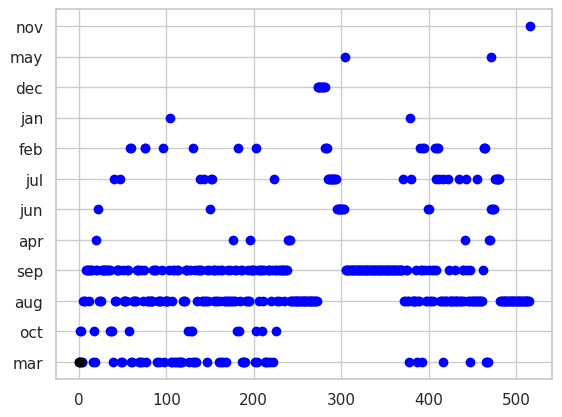

In [ ]:
from sklearn.metrics import r2_score

plt.figure()
plt.scatter(x=list(range(len(Y))), y=Y, color='blue')  # Plotting actual values
plt.scatter(x=list(range(len(y_pred))), y=y_pred, color='black')  # Plotting predicted values
plt.show()

Here, we can see the scatter plot of actual fire which is blue and the predicted fire that is indicated black.